## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("BlokO.csv")

In [3]:
dataset.drop(columns="Option",axis=1, inplace=True)

In [4]:
dataset.head()

,in:Afstand van Straat,in:Inkeping Hoek,in:Overspanning Vloer,in:Bouwsysteem,in:Vleugel Woningdiepte,in:Belemmeringshoek Zuid,in:Belemmeringshoek Noord,out:MPG [€/m2 per jaar],out:Gewicht [t],out:BVO Wonen Blok O[m2],...,out:Vormfactor [GBO/BVO],out:Terrassen [m2],out:% >2 Zonuren Terrassen,out:% >2 Zonuren Straat O,out:% >2 Zonuren Gevels,out:% >2 Zonuren Gevels Buren,out:% >2 Zonuren Binnentuin,out:% >15% Gevel Daglicht,out:% >30% Gevel Daglicht,img
0,0.0,0 Grid,0,CLT Vloer/Wanden,6.3,30,30,0.204,4170,9591,...,0.49,1712,53,53,71,87,87,100,76,AfstandvanStraat0_InkepingHoek0Grid_Overspanni...
1,3.6,0 Grid,0,CLT Vloer/Wanden,6.3,30,30,0.204,4130,9513,...,0.49,1637,61,73,70,87,86,100,76,AfstandvanStraat3.6_InkepingHoek0Grid_Overspan...
2,0.0,0.5 Grid,0,CLT Vloer/Wanden,6.3,30,30,0.205,4134,9472,...,0.48,1689,57,53,72,87,89,100,78,AfstandvanStraat0_InkepingHoek0.5Grid_Overspan...
3,3.6,0.5 Grid,0,CLT Vloer/Wanden,6.3,30,30,0.205,4093,9390,...,0.48,1613,60,73,71,87,88,100,79,AfstandvanStraat3.6_InkepingHoek0.5Grid_Oversp...
4,0.0,1 Grid,0,CLT Vloer/Wanden,6.3,30,30,0.205,4072,9364,...,0.48,1665,57,53,72,87,92,100,82,AfstandvanStraat0_InkepingHoek1Grid_Overspanni...


In [5]:
# getting some info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   in:Afstand van Straat          1152 non-null   float64
 1   in:Inkeping Hoek               1152 non-null   object 
 2   in:Overspanning Vloer          1152 non-null   int64  
 3   in:Bouwsysteem                 1152 non-null   object 
 4   in:Vleugel Woningdiepte        1152 non-null   float64
 5   in:Belemmeringshoek Zuid       1152 non-null   int64  
 6   in:Belemmeringshoek Noord      1152 non-null   int64  
 7   out:MPG [€/m2 per jaar]        1152 non-null   float64
 8   out:Gewicht [t]                1152 non-null   int64  
 9   out:BVO Wonen Blok O[m2]       1152 non-null   int64  
 10  out:Overspanning [m]           1152 non-null   float64
 11  out:Vormfactor [GBO/BVO]       1152 non-null   float64
 12  out:Terrassen [m2]             1152 non-null   i

In [6]:
dataset.describe()

,in:Afstand van Straat,in:Overspanning Vloer,in:Vleugel Woningdiepte,in:Belemmeringshoek Zuid,in:Belemmeringshoek Noord,out:MPG [€/m2 per jaar],out:Gewicht [t],out:BVO Wonen Blok O[m2],out:Overspanning [m],out:Vormfactor [GBO/BVO],out:Terrassen [m2],out:% >2 Zonuren Terrassen,out:% >2 Zonuren Straat O,out:% >2 Zonuren Gevels,out:% >2 Zonuren Gevels Buren,out:% >2 Zonuren Binnentuin,out:% >15% Gevel Daglicht,out:% >30% Gevel Daglicht
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.0,1152.000000
mean,1.800000,1.000000,8.100000,37.500000,37.500000,0.228075,5419.032118,10714.131076,5.400000,0.460495,1250.541667,58.453993,63.000000,71.453993,86.845486,90.767361,100.0,80.581597
std,1.800782,0.816851,1.470332,7.503257,7.503257,0.028513,2734.770652,910.940302,2.013335,0.013719,302.913650,15.192926,10.004343,0.971157,0.361598,4.596457,0.0,3.304728
min,0.000000,0.000000,6.300000,30.000000,30.000000,0.175000,2897.000000,8768.000000,3.600000,0.430000,762.000000,32.000000,53.000000,69.000000,86.000000,83.000000,100.0,74.000000
25%,0.000000,0.000000,6.300000,30.000000,30.000000,0.204750,3571.000000,10014.000000,4.275000,0.450000,1062.750000,51.000000,53.000000,71.000000,87.000000,87.000000,100.0,77.750000
50%,1.800000,1.000000,8.100000,37.500000,37.500000,0.232000,4073.000000,10698.000000,4.950000,0.460000,1243.000000,57.000000,63.000000,71.000000,87.000000,90.500000,100.0,82.000000
75%,3.600000,2.000000,9.900000,45.000000,45.000000,0.247000,6207.250000,11307.000000,5.400000,0.470000,1402.750000,69.750000,73.000000,72.000000,87.000000,94.000000,100.0,83.000000
max,3.600000,2.000000,9.900000,45.000000,45.000000,0.281000,13032.000000,12752.000000,10.800000,0.490000,1807.000000,84.000000,73.000000,75.000000,87.000000,100.000000,100.0,85.000000


## Understand Correlation and Analyse Data

In [7]:
correlation = dataset.corr()

<AxesSubplot:>

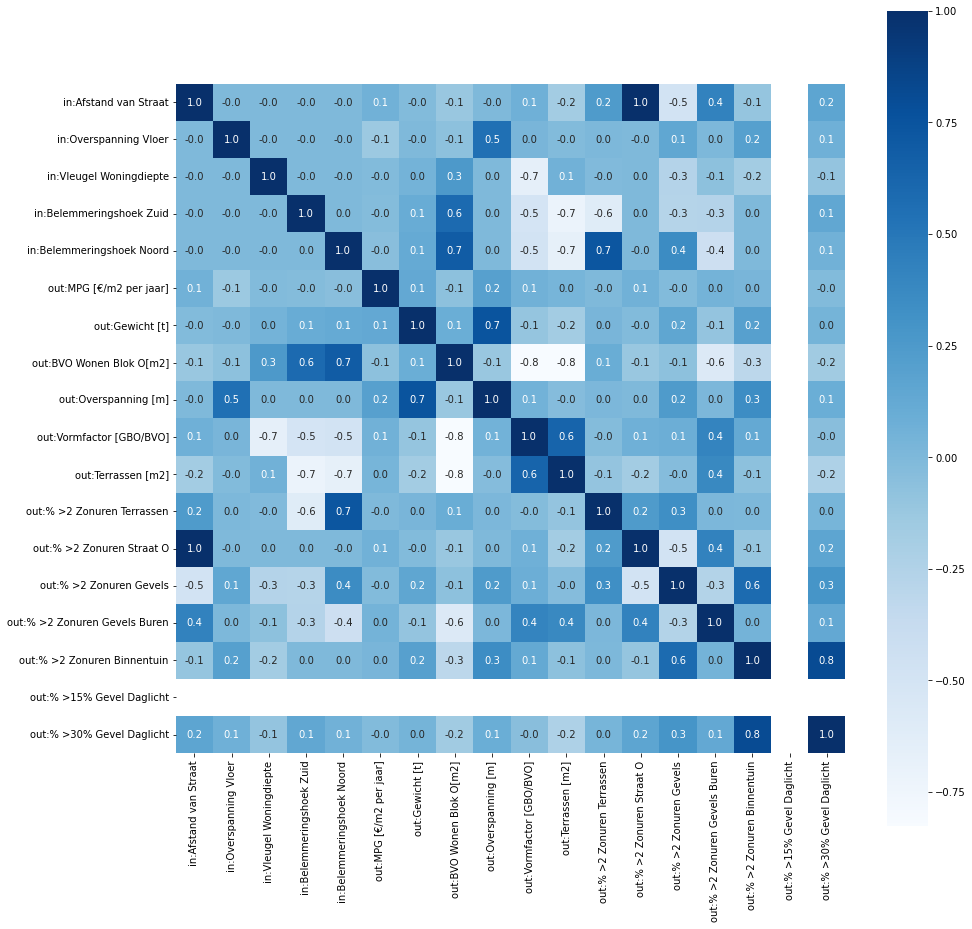

In [8]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":10}, cmap="Blues")

C:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='out:BVO Wonen Blok O[m2]', ylabel='Density'>

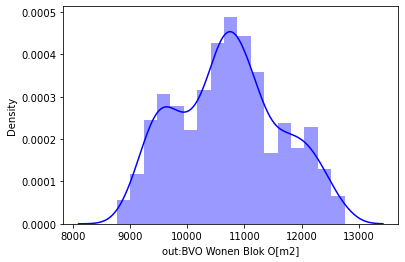

In [9]:
sns.distplot(dataset["out:BVO Wonen Blok O[m2]"], color="b")

C:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='out:Overspanning [m]', ylabel='Density'>

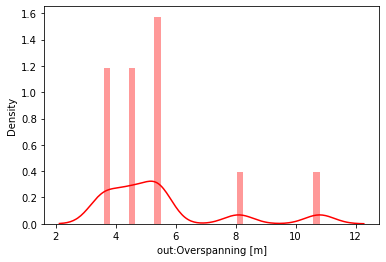

In [10]:
sns.distplot(dataset["out:Overspanning [m]"], color="r")

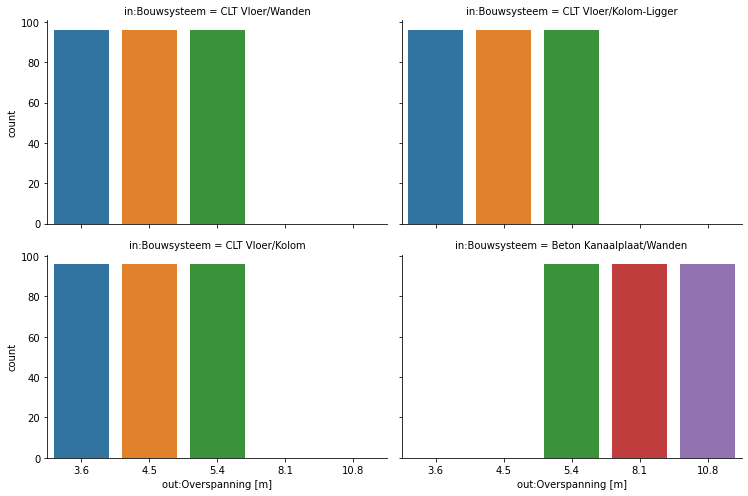

In [36]:
g = sns.catplot(x = "out:Overspanning [m]", col="in:Bouwsysteem", col_wrap=2,
                data= dataset, 
                kind="count", height=3.5, aspect=1.5)

C:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='in:Vleugel Woningdiepte', ylabel='Density'>

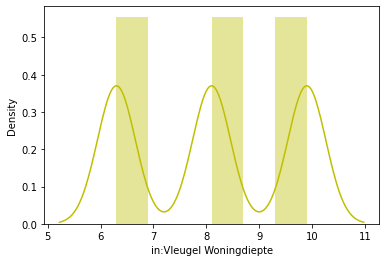

In [12]:
sns.distplot(dataset["in:Vleugel Woningdiepte"], color="y")

C:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='out:Terrassen [m2]', ylabel='Density'>

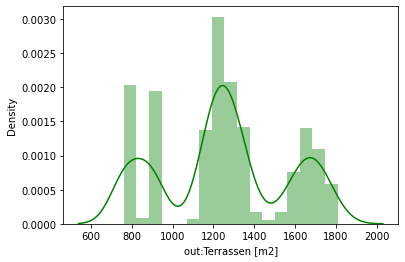

In [13]:
sns.distplot(dataset["out:Terrassen [m2]"], color="g")

## Define Input and Labels

In [14]:
input_cols = ["in:Afstand van Straat",
              "in:Vleugel Woningdiepte",
              "out:Overspanning [m]",
              "out:Terrassen [m2]"]
output_cols = ["out:MPG [€/m2 per jaar]",
               "out:BVO Wonen Blok O[m2]",
               "out:Vormfactor [GBO/BVO]",
               "out:% >2 Zonuren Terrassen",
               "out:% >2 Zonuren Straat O",
               "out:% >2 Zonuren Gevels",
              "out:% >2 Zonuren Binnentuin",
              "out:% >15% Gevel Daglicht",
              "out:% >30% Gevel Daglicht"]

In [15]:
X = dataset[input_cols]
y = dataset[output_cols]

In [16]:
X.head()

,in:Afstand van Straat,in:Vleugel Woningdiepte,out:Overspanning [m],out:Terrassen [m2]
0,0.0,6.3,3.6,1712
1,3.6,6.3,3.6,1637
2,0.0,6.3,3.6,1689
3,3.6,6.3,3.6,1613
4,0.0,6.3,3.6,1665


In [17]:
y.head()

,out:MPG [€/m2 per jaar],out:BVO Wonen Blok O[m2],out:Vormfactor [GBO/BVO],out:% >2 Zonuren Terrassen,out:% >2 Zonuren Straat O,out:% >2 Zonuren Gevels,out:% >2 Zonuren Binnentuin,out:% >15% Gevel Daglicht,out:% >30% Gevel Daglicht
0,0.204,9591,0.49,53,53,71,87,100,76
1,0.204,9513,0.49,61,73,70,86,100,76
2,0.205,9472,0.48,57,53,72,89,100,78
3,0.205,9390,0.48,60,73,71,88,100,79
4,0.205,9364,0.48,57,53,72,92,100,82


## Train Test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
model = DecisionTreeRegressor()

In [20]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

## Model evaluation

In [21]:
# evaluate on train dataset
X_train_predictions = model.predict(X_train)
train_accuracy = metrics.r2_score(y_train, X_train_predictions)
print(f"Train accuracy is {(train_accuracy * 100):.2f}%")

Train accuracy is 87.81%


Text(0.5, 1.0, 'True vs Predicted values ')

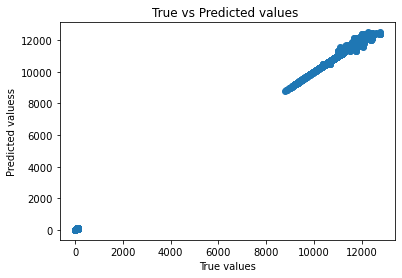

In [22]:
plt.scatter(y_train, X_train_predictions)
plt.xlabel("True values")
plt.ylabel("Predicted valuess")
plt.title("True vs Predicted values ")

In [23]:
# evaluate on test dataset
X_test_predictions = model.predict(X_test)
test_accuracy = metrics.r2_score(y_test, X_test_predictions)
print(f"Test accuracy is {(test_accuracy * 100):.2f}%")

Test accuracy is 64.97%


Text(0.5, 1.0, 'True vs Predicted values ')

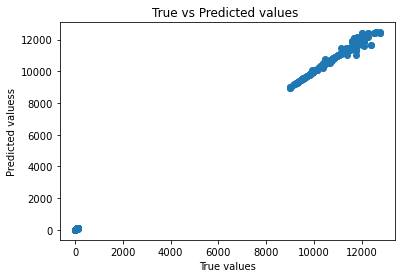

In [24]:
plt.scatter(y_test, X_test_predictions)
plt.xlabel("True values")
plt.ylabel("Predicted valuess")
plt.title("True vs Predicted values ")

## Predict on values

In [25]:
"""
Test prediction is based on the following:

input_cols = ["in:Afstand van Straat",
              "in:Vleugel Woningdiepte",
              "out:Overspanning [m]","out:Terrassen [m2]"]
              
              
output_cols = ["out:MPG [€/m2 per jaar]",
               "out:BVO Wonen Blok O[m2]",
               "out:Vormfactor [GBO/BVO]",
               "out:% >2 Zonuren Terrassen",
               "out:% >2 Zonuren Straat O",
               "out:% >2 Zonuren Gevels",
              "out:% >2 Zonuren Binnentuin",
              "out:% >15% Gevel Daglicht",
              "out:% >30% Gevel Daglicht"]
"""

'\nTest prediction is based on the following:\n\ninput_cols = ["in:Afstand van Straat",\n              "in:Vleugel Woningdiepte",\n              "out:Overspanning [m]","out:Terrassen [m2]"]\n              \n              \noutput_cols = ["out:MPG [€/m2 per jaar]",\n               "out:BVO Wonen Blok O[m2]",\n               "out:Vormfactor [GBO/BVO]",\n               "out:% >2 Zonuren Terrassen",\n               "out:% >2 Zonuren Straat O",\n               "out:% >2 Zonuren Gevels",\n              "out:% >2 Zonuren Binnentuin",\n              "out:% >15% Gevel Daglicht",\n              "out:% >30% Gevel Daglicht"]\n'

In [26]:
X_test.head()

,in:Afstand van Straat,in:Vleugel Woningdiepte,out:Overspanning [m],out:Terrassen [m2]
408,0.0,8.1,3.6,1299
977,3.6,8.1,5.4,771
578,0.0,6.3,3.6,1319
971,3.6,8.1,4.5,771
1137,3.6,9.9,8.1,771


In [27]:
input_data = X_test.iloc[0]

In [28]:
input_data

in:Afstand van Straat         0.0
in:Vleugel Woningdiepte       8.1
out:Overspanning [m]          3.6
out:Terrassen [m2]         1299.0
Name: 408, dtype: float64

In [29]:
prediction = model.predict([input_data])

C:\Users\Javier\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [30]:
print(prediction)

[[2.2500e-01 1.0965e+04 4.6000e-01 3.4000e+01 5.3000e+01 7.1000e+01
  8.6000e+01 1.0000e+02 7.6000e+01]]
